<a href="https://colab.research.google.com/github/RDifault/Machine-and-Deep-Learning-Projects/blob/main/Raisin_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raisin Binary Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('Raisin_Dataset.csv')

df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [ ]:
df['Target'] = LabelEncoder().fit_transform(df['Class'])
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Target
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen,1
...,...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni,0


In [ ]:
x_data = df.drop(['Class', 'Target'], axis=1)
y_data = df['Target']

x_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548


In [ ]:
y_data

0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: Target, Length: 900, dtype: int64

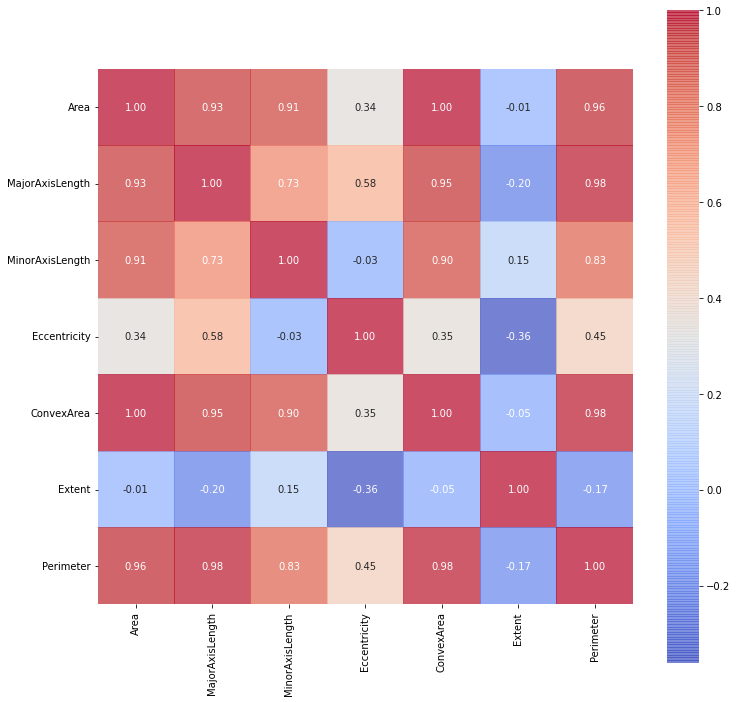

In [ ]:
plt.figure(figsize=(12,12))
sn.heatmap(x_data.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',
           alpha = 0.7,   cmap= 'coolwarm')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler((-1,1))
x_data2 = scaler.fit_transform(x_data)

x_data2

array([[-0.40725937, -0.43857192, -0.371248  , ..., -0.4889915 ,
         0.66284359, -0.45641823],
       [-0.52514547, -0.53072446, -0.43011069, ..., -0.58227215,
         0.33570897, -0.51631589],
       [-0.37547458, -0.43851739, -0.2964431 , ..., -0.46383262,
         0.13150828, -0.4328119 ],
       ...,
       [-0.2915196 , -0.46588705, -0.10991227, ..., -0.36428407,
         0.58579302, -0.35174791],
       [-0.35003339, -0.35019627, -0.36617061, ..., -0.43260419,
         0.22450878, -0.3847304 ],
       [-0.42552704, -0.2575711 , -0.58939523, ..., -0.49969454,
         0.10695662, -0.37095819]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_features = pca.fit_transform(x_data2)

In [ ]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[74.97465892 92.34640966 98.79369283 99.55312263]



In [ ]:
from sklearn.model_selection import train_test_split
# x_train, x_test,  y_train, y_test = train_test_split(x_data2, y_data, test_size=0.3)
x_train, x_test,  y_train, y_test = train_test_split(pca_features, y_data, test_size=0.3)
# x_train, x_test,  y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(630, 4)
(270, 4)
(630,)
(270,)


In [ ]:
model = Sequential()

#Hidden Layer pertama
model.add(Dense(2000, input_shape=(4,),name="HL-1", activation="relu"))

#Hidden Layer kedua
model.add(Dense(1000, name="HL-2", activation="relu"))

#Hidden Layer ketiga
model.add(Dense(500, name="HL-3", activation="relu"))

#Hidden Layer keempat
model.add(Dense(100, name="HL-4", activation="relu"))

#Hidden Layer kelima
# model.add(Dense(64, name="HL-5", activation="relu"))

#Output layer
model.add(Dense(1, name="Output-Layer", activation="sigmoid"))

#Compile Model
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL-1 (Dense)                (None, 2000)              10000     
                                                                 
 HL-2 (Dense)                (None, 1000)              2001000   
                                                                 
 HL-3 (Dense)                (None, 500)               500500    
                                                                 
 HL-4 (Dense)                (None, 100)               50100     
                                                                 
 Output-Layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 2,561,701
Trainable params: 2,561,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def evaluate(train_y, train_pred, val_y, val_pred):
    train_acc = round(accuracy_score([np.argmax(d) for d in train_y], [np.argmax(d) for d in train_pred]) * 100, 2)
    val_acc = round(accuracy_score([np.argmax(d) for d in val_y], [np.argmax(d) for d in val_pred]) * 100, 2)
    bias = round(100 - train_acc, 2)
    variance = round(train_acc - val_acc, 2)
    print("Training accuracy:", str(train_acc) + "%")
    print("Validation accuracy:", str(val_acc) + "%")
    print()
    print("Bias:", str(bias) + "%")
    print("Variance:", str(variance) + "%")

Epoch 1/20
16/16 [==============================] - 2s 50ms/step - loss: 0.4264 - accuracy: 0.8155 - val_loss: 0.4501 - val_accuracy: 0.8889
Epoch 2/20
16/16 [==============================] - 1s 43ms/step - loss: 0.3398 - accuracy: 0.8532 - val_loss: 0.3931 - val_accuracy: 0.8413
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 0.3304 - accuracy: 0.8611 - val_loss: 0.4230 - val_accuracy: 0.8968
Epoch 4/20
16/16 [==============================] - 1s 54ms/step - loss: 0.3298 - accuracy: 0.8651 - val_loss: 0.3986 - val_accuracy: 0.8810
Epoch 5/20
16/16 [==============================] - 1s 64ms/step - loss: 0.3193 - accuracy: 0.8690 - val_loss: 0.4434 - val_accuracy: 0.8889
Epoch 6/20
16/16 [==============================] - 1s 65ms/step - loss: 0.3197 - accuracy: 0.8571 - val_loss: 0.4198 - val_accuracy: 0.8571
Epoch 7/20
16/16 [==============================] - 1s 39ms/step - loss: 0.3087 - accuracy: 0.8631 - val_loss: 0.5529 - val_accuracy: 0.8651
Epoch 8/20
16

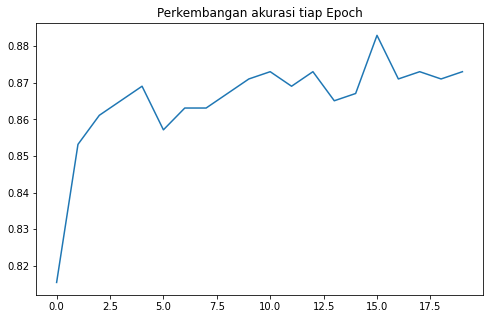

In [ ]:
import matplotlib.pyplot as plt

fitting=model.fit(x_train, y_train, epochs=20, verbose=1, validation_split=0.2)

pd.DataFrame(fitting.history)["accuracy"].plot(figsize=(8,5))
plt.title("Perkembangan akurasi tiap Epoch")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 0.4951 - accuracy: 0.8741


[0.49506038427352905, 0.8740741014480591]

In [ ]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model, x_train, y_train, x_test, y_test,
        loss='mse',
        num_rounds=100,
        random_seed=123,
        epochs=200,
        verbose=1)

ImportError: ignored